## Sparks - Retail EDA
#Try to find weak areas to make more profit
#Which business problems can you derive?

In [121]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
data = pd.read_csv("SampleSuperstore.csv")

In [6]:
data.head(15)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [7]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
#Data cleaning
data.isnull().values.any() #Check for null values

False

In [9]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
# Check for duplicates
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

In [11]:
data.duplicated().sum()

17

In [12]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.duplicated().sum()

0

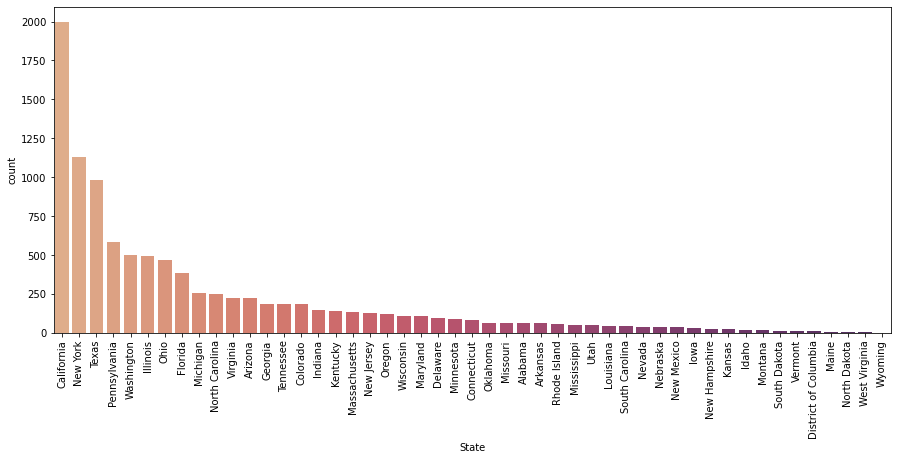

In [21]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x=data["State"],data= data,order = data["State"].value_counts().index,palette='flare')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  #it will rotate text on x axis
plt.show()

Observation 1 
Highest number of buyers are from California, New York and Texas.

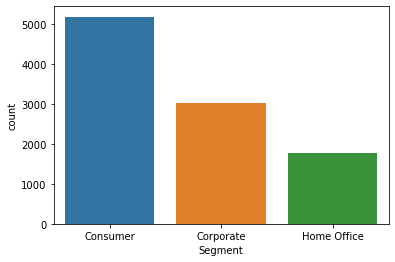

In [16]:
ax = sns.countplot(x=data["Segment"])

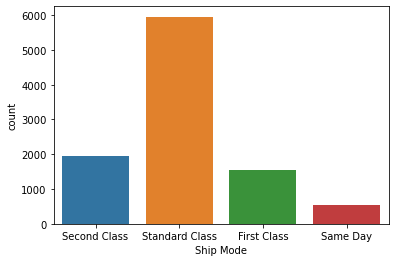

In [17]:
ax = sns.countplot(x=data["Ship Mode"])

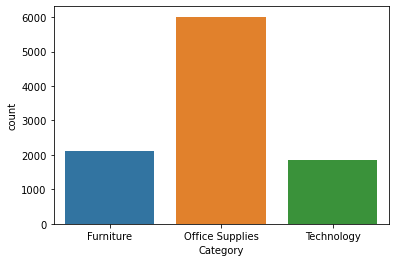

In [18]:
ax = sns.countplot(x= data["Category"])

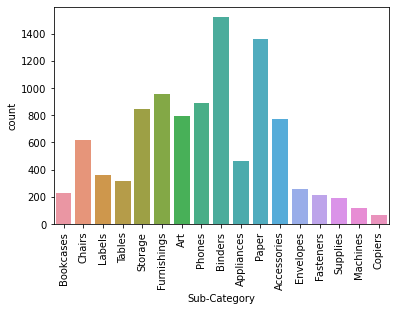

In [19]:
ax = sns.countplot(x= data["Sub-Category"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  #it will rotate text on x axis
plt.show()

Observation 2

The best-selling goods are Binders and Paper. And the least selling goods are Copiers and Machines

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

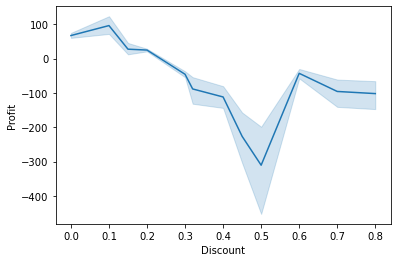

In [22]:
#Discount vs profit
sns.lineplot(data=data, x="Discount", y="Profit")

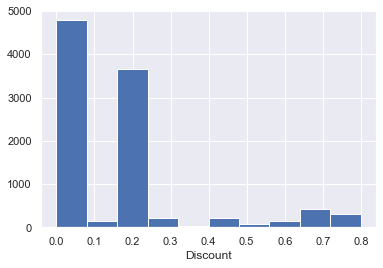

In [129]:
sns.set()
plt.hist(data['Discount'])
plt.xlabel('Discount')
plt.show()

Observation 3

The  discount were mostly given in the amount of 0% and 20%


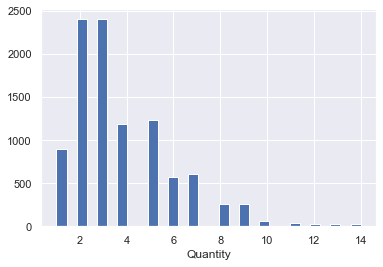

In [58]:
plt.hist(data['Quantity'],bins=30)
plt.xlabel('Quantity')
plt.show()

Observation 4
Customers bought products mostly in quantity of 2 and 3

In [83]:
#Profit and Sales across regions
df_region_sp = data.groupby('Region')[['Sales','Profit']].sum()


Text(0, 0.5, 'Profit and Sales')

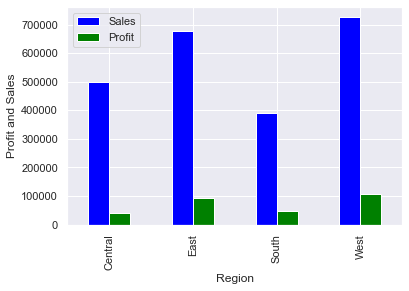

In [128]:
df_region_sp.plot.bar(color=['blue','green'])
plt.ylabel("Profit and Sales")

Observation 5

The highest sales and profit are in the West. 
The lowest profit is in the South

In [86]:
df_category_sp = data.groupby('Category')[['Sales','Profit']].sum()

Text(0, 0.5, 'Profit and Sales')

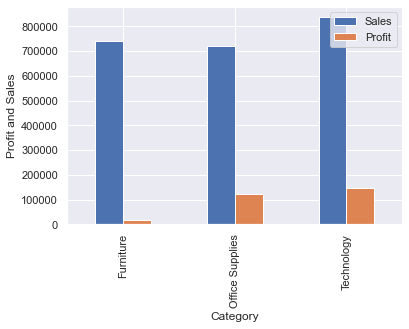

In [127]:
df_category_sp.plot.bar()
plt.ylabel("Profit and Sales")

Observation 6
Technology has the highest profit
Furniture has the lowest profit

Text(0, 0.5, 'Profit and Sales')

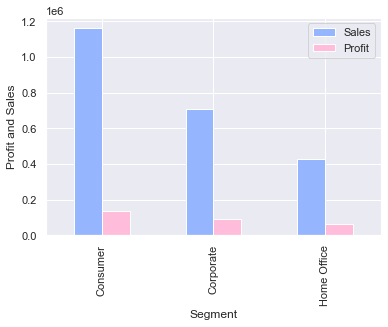

In [126]:
df_segment_sp = data.groupby('Segment')[['Sales','Profit']].sum()
df_segment_sp.plot.bar(color=['#95b6ff','#ffbcdb'])
plt.ylabel("Profit and Sales")

Observation 7
The highest profit and sales are in 'Consumer' segment and the lowest in 'Home Office' segment

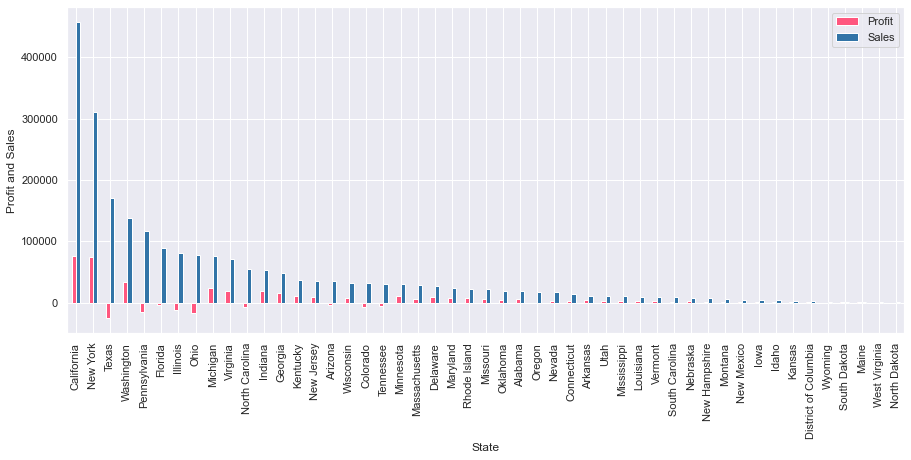

In [122]:
df_states_sp = data.groupby('State')[['Profit','Sales']].sum().sort_values('Sales',ascending=False)
ax=df_states_sp.plot.bar(figsize=(15,6),color=['#ff577f','#3274a7'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)#it will rotate text on x axis
ax.set_ylabel("Profit and Sales")
plt.show()

Observation 8
Califronia and New York have the highest profits

Texas,Pennsylvania,Ohio,Illinois have loss.

Text(0, 0.5, 'Profit/Loss and Sales')

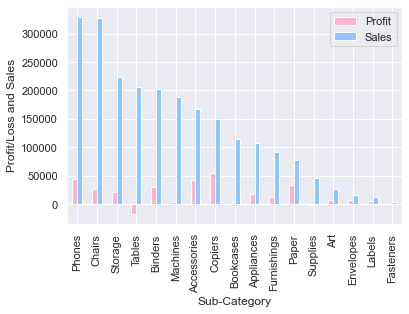

In [134]:
df_sub_category_sp = data.groupby('Sub-Category')[['Profit','Sales']].sum().sort_values('Sales',ascending=False)
df_sub_category_sp.plot.bar(color=['#ffb2d2','#8ec6ff'])
plt.ylabel('Profit/Loss and Sales')

Observation 9

Highest profit have Phones,Copiers,Accessories  and Paper
Tables  and Bookcases have loss